In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
heart_faliure_data = pd.read_csv("heart_update_.csv")
heart_faliure_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cp,Cholesterol,MaxHR,Height,Weight,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,3,289,172,73.847017,241.893563,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,2,180,156,68.781904,162.310473,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,283,98,74.110105,212.740856,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,214,108,71.730978,220.042470,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,0,195,122,69.881796,206.349801,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0,127,64.425194,169.109401,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0,110,67.852131,194.744522,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,0,139,67.549069,183.266533,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0,131,74.767447,210.369909,0


## outlier

In [3]:
#most outlier column
# creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,Cholesterol,Weight

In [4]:
# Select the column of interest
col1 = heart_faliure_data['platelets']
col2 = heart_faliure_data['creatinine_phosphokinase']
col3 = heart_faliure_data['serum_creatinine']

# Calculate the first and third quartiles
q1 = col1.quantile(0.25)
q3 = col1.quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Print the results
print("First Quartile (Q1):", q1)
print("Third Quartile (Q3):", q3)
print("Interquartile Range (IQR):", iqr)

First Quartile (Q1): 212500.0
Third Quartile (Q3): 303500.0
Interquartile Range (IQR): 91000.0


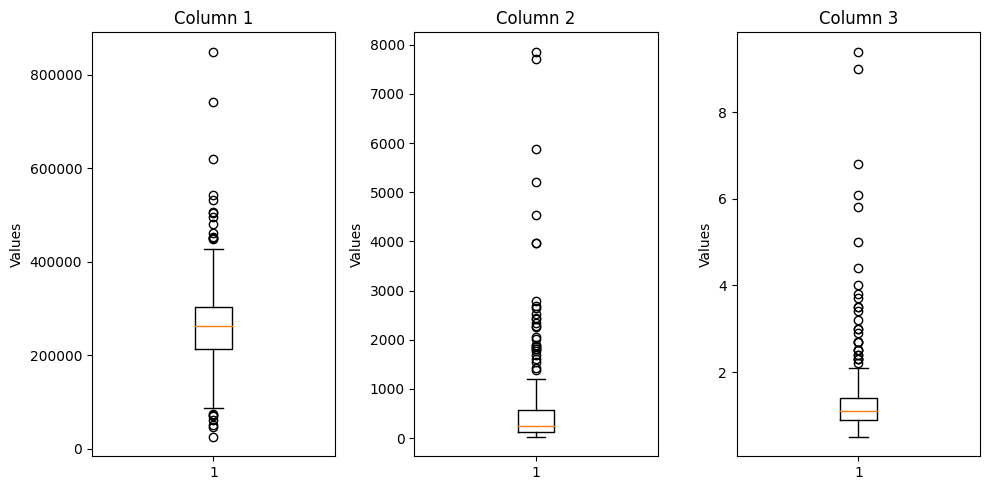

In [5]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Create a box plot for each column on a separate axis
axs[0].boxplot(col1)
axs[1].boxplot(col2)
axs[2].boxplot(col3)

# Add labels and title for each subplot
axs[0].set_title('Column 1')
axs[0].set_ylabel('Values')
axs[1].set_title('Column 2')
axs[1].set_ylabel('Values')
axs[2].set_title('Column 3')
axs[2].set_ylabel('Values')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
cp                          0
Cholesterol                 0
MaxHR                       0
Height                      0
Weight                      0
DEATH_EVENT                 0
dtype: int64


In [7]:
heart_faliure_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
anaemia,299.0,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
creatinine_phosphokinase,299.0,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
diabetes,299.0,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.0,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
high_blood_pressure,299.0,0.351171,0.478136,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,299.0,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.0,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.0,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
sex,299.0,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000


In [8]:
heart_faliure_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cp,Cholesterol,MaxHR,Height,Weight,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.966555,242.207358,138.638796,68.833944,186.410264,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,1.029213,75.102908,23.720902,2.780809,19.930600,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.000000,0.000000,82.000000,61.477809,135.655876,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.000000,201.000000,122.000000,66.970143,171.640522,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,1.000000,237.000000,140.000000,68.589270,184.461812,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,2.000000,277.000000,155.000000,70.979847,199.374369,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,3.000000,603.000000,190.000000,76.709835,241.893563,1.00000


# Feature selection

### correlation analysis

<Axes: >

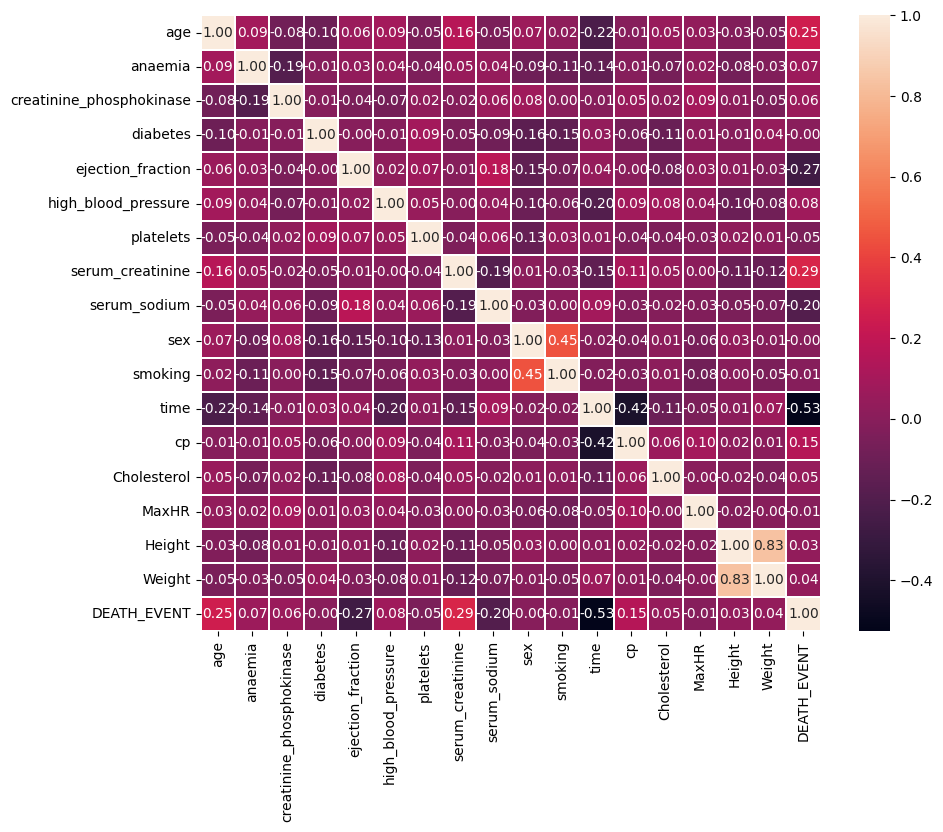

In [9]:
cor=heart_faliure_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(cor,linewidth=.1,annot=True,fmt=".2f")

In [10]:
# Calculate the correlation coefficients between the output variable and each input variable
correlations = heart_faliure_data.corr()['DEATH_EVENT']

# Sort the correlations in ascending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print the sorted list of input variables in ascending order of correlation with the output variable
print("Columns sorted in ascending order of correlation with the output column:")
print(sorted_correlations)


Columns sorted in ascending order of correlation with the output column:
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
cp                          0.154846
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
Cholesterol                 0.045008
Weight                      0.038607
Height                      0.033432
diabetes                   -0.001943
sex                        -0.004316
MaxHR                      -0.010080
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


### Split the data into train test split

In [11]:
heart_faliure_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'cp',
       'Cholesterol', 'MaxHR', 'Height', 'Weight', 'DEATH_EVENT'],
      dtype='object')

In [12]:
x=heart_faliure_data[["serum_creatinine","age","cp","high_blood_pressure","anaemia","creatinine_phosphokinase","Cholesterol","Weight"]]
# creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,Cholesterol,Weight

y=heart_faliure_data['DEATH_EVENT']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### standardized the data

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# from sklearn.preprocessing import MinMaxScaler
# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit the scaler to the data and transform the data
# X_normalized = scaler.fit_transform(x)

# PCA

In [14]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=5)

# Fit the PCA model to the training data
pca.fit(x_train)

# Transform the training and test data using the PCA model
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Train a logistic regression model on the transformed data
model = LogisticRegression()
model.fit(x_train_pca, y_train)

# Evaluate the model on the test data
score = model.score(x_test_pca, y_test)
print("Accuracy:", score)

Accuracy: 0.7166666666666667


# SMOTE

In [15]:
heart_faliure_data["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [16]:
print("Number of transactions X__train dataset: ", x_train.shape)  
print("Number of transactions y__train dataset: ", y_train.shape)  
print("Number of transactions X__test dataset: ", x_test.shape)  
print("Number of transactions y__test dataset: ", y_test.shape)  

Number of transactions X__train dataset:  (239, 8)
Number of transactions y__train dataset:  (239,)
Number of transactions X__test dataset:  (60, 8)
Number of transactions y__test dataset:  (60,)


In [17]:
# importing SMOTE module from imblearn library  
# pip install imblearn (if you don't have imblearn in your system)  
print("Before Over Sampling, count of the label '1': {}".format(sum(y_train == 1)))  
print("Before Over Sampling, count of the label '0': {} \n".format(sum(y_train == 0)))  

sm1 = SMOTE(random_state = 2)  
x_train_res, y_train_res = sm1.fit_resample(x_train, y_train.ravel())  
print('After Over Sampling, the shape of the train_X: {}'.format(x_train_res.shape))  
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_res.shape))  
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_res == 1)))  
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_res == 0)))  

Before Over Sampling, count of the label '1': 77
Before Over Sampling, count of the label '0': 162 

After Over Sampling, the shape of the train_X: (324, 8)
After Over Sampling, the shape of the train_y: (324,) 

After Over Sampling, count of the label '1': 162
After Over Sampling, count of the label '0': 162


### Apply machine learning classification algorithm

In [18]:
# Create a logistic regression object
logreg = LogisticRegression()

# Fit the model using the training data
logreg.fit(x_train_res, y_train_res)

# Make predictions on the testing data
y_pred = logreg.predict(x_test)

# Calculate the accuracy of the model
accuracy_lg = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lg)

Accuracy: 0.6666666666666666


In [19]:
# Create a logistic regression object
svm = SVC()

# Fit the model using the training data
svm.fit(x_train_res, y_train_res)

# Make predictions on the testing data
y_pred_svm= svm.predict(x_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_pred_svm, y_test)
print("Accuracy:", accuracy_svm)

Accuracy: 0.6333333333333333


In [20]:
bayes=GaussianNB()

# Fit the model using the training data
bayes.fit(x_train_res, y_train_res)

# Make predictions on the testing data
y_pred_bayes= bayes.predict(x_test)

# Calculate the accuracy of the model
accuracy_bayes = accuracy_score(y_pred_bayes, y_test)
print("Accuracy:", accuracy_bayes)

Accuracy: 0.6666666666666666


In [21]:
knn=KNeighborsClassifier()

# Fit the model using the training data
knn.fit(x_train_res, y_train_res)

# Make predictions on the testing data
y_pred_knn= knn.predict(x_test)

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print("Accuracy:", accuracy_knn)

Accuracy: 0.6


In [22]:
tree=DecisionTreeClassifier()

# Fit the model using the training data
tree.fit(x_train_res, y_train_res)

# Make predictions on the testing data
y_pred_tree= tree.predict(x_test)

# Calculate the accuracy of the model
accuracy_tree = accuracy_score(y_pred_tree, y_test)
print("Accuracy:", accuracy_tree)


Accuracy: 0.7333333333333333


In [23]:
rf=RandomForestClassifier()
# Fit the model using the training data
rf.fit(x_train_res, y_train_res)

# Make predictions on the testing data
y_pred_rf= rf.predict(x_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print("Accuracy:", accuracy_rf)


Accuracy: 0.7166666666666667


## Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
# Use cross-validation to evaluate the model

# Create a logistic regression model
lg_model = LogisticRegression()

lg_cross = cross_val_score(lg_model,x_train_res, y_train_res, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores:", lg_cross)

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy: {:.2f}".format(np.mean(lg_cross)))
print("Standard deviation: {:.2f}".format(np.std(lg_cross)))

Accuracy scores: [0.61538462 0.72307692 0.72307692 0.63076923 0.640625  ]
Mean accuracy: 0.67
Standard deviation: 0.05


In [25]:
from sklearn.model_selection import cross_val_score
# Use cross-validation to evaluate the model

# Create a logistic regression model
svc_model = SVC()

svm_cross = cross_val_score(svc_model,x_train_res, y_train_res, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores:", svm_cross)

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy: {:.2f}".format(np.mean(svm_cross)))
print("Standard deviation: {:.2f}".format(np.std(svm_cross)))

Accuracy scores: [0.73846154 0.72307692 0.72307692 0.75384615 0.765625  ]
Mean accuracy: 0.74
Standard deviation: 0.02


In [26]:
from sklearn.model_selection import cross_val_score
# Use cross-validation to evaluate the model

# Create a logistic regression model
knn_model = KNeighborsClassifier()

knn_cross = cross_val_score(knn_model,x_train_res, y_train_res, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores:", knn_cross)

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy: {:.2f}".format(np.mean(knn_cross)))
print("Standard deviation: {:.2f}".format(np.std(knn_cross)))

Accuracy scores: [0.75384615 0.72307692 0.8        0.70769231 0.75      ]
Mean accuracy: 0.75
Standard deviation: 0.03


In [27]:
from sklearn.model_selection import cross_val_score
# Use cross-validation to evaluate the model

# Create a logistic regression model
tree_model = DecisionTreeClassifier()

tree_cross = cross_val_score(tree_model,x_train_res, y_train_res, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores:", tree_cross)

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy: {:.2f}".format(np.mean(tree_cross)))
print("Standard deviation: {:.2f}".format(np.std(tree_cross)))

Accuracy scores: [0.66153846 0.72307692 0.76923077 0.8        0.71875   ]
Mean accuracy: 0.73
Standard deviation: 0.05


In [28]:
from sklearn.model_selection import cross_val_score
# Use cross-validation to evaluate the model

# Create a logistic regression model
rf_model = RandomForestClassifier()

rf_cross = cross_val_score(rf_model, x_train_res, y_train_res, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_cross)

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy: {:.2f}".format(np.mean(rf_cross)))
print("Standard deviation: {:.2f}".format(np.std(rf_cross)))

Accuracy scores: [0.73846154 0.8        0.81538462 0.83076923 0.90625   ]
Mean accuracy: 0.82
Standard deviation: 0.05


In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 8)
(60, 8)
(239,)
(60,)


## Hyperparameter Tunining

In [30]:
# Define the hyperparameters to tune
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10],
                   'solver': ['liblinear', 'saga'],
                   'max_iter': [100, 500, 1000]}

# Create a logistic regression model
logreg = LogisticRegression()

# Create a grid search object
gridsearch_lg = GridSearchCV(logreg, hyperparameters, cv=5)

# Fit the grid search object to the training data
gridsearch_lg.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters:", gridsearch_lg.best_params_)

# Evaluate the model performance using the testing data
y_pred = gridsearch_lg.predict(x_test)
# acc_lg = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

lg_score=gridsearch_lg.best_score_
lg_score

Best hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


0.6727403846153847

In [31]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3, 4],
              'gamma': ['scale', 'auto']}

# Create an SVM model object
svm_model = SVC()

# Create a GridSearchCV object to perform hyperparameter tuning
gridsearch_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
gridsearch_svm.fit(x_train_res, y_train_res)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", gridsearch_svm.best_params_)

# Evaluate the final model on the test set
y_pred = gridsearch_svm.predict(x_test)

svm_score=gridsearch_svm.best_score_
svm_score

Best hyperparameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


0.805673076923077

In [32]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create a Gaussian Naive Bayes model object
nb_model = GaussianNB()

# Create a GridSearchCV object to perform hyperparameter tuning
gridsearch_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
gridsearch_nb.fit(x_train_res, y_train_res)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", gridsearch_nb.best_params_)
nb_score=gridsearch_nb.best_score_
nb_score

Best hyperparameters: {'var_smoothing': 1e-09}


0.6416826923076923

In [33]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

# Create a decision tree model object
clf_grid = DecisionTreeClassifier()

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(clf_grid, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)
tree_score=grid_search.best_score_
tree_score

Best parameters:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}


0.7573581560283689

In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create random forest regressor
rf_grid = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
gridsearch_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
gridsearch_rf.fit(x_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", gridsearch_rf.best_params_)
rf_score=gridsearch_rf.best_score_
rf_score

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


0.7363475177304964

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
bayes_grid = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_naves = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8]],  # Example priors, customize as needed
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Example var_smoothing values, customize as needed
}

# Create a GridSearchCV object
grid_search_naves = GridSearchCV(estimator=bayes, param_grid=param_grid_naves, scoring='accuracy', cv=5)

# Fit the model using the resampled training data
grid_search_naves.fit(x_train_res, y_train_res)

# Get the best hyperparameters
best_params_naves = grid_search_naves.best_params_
print("Best Hyperparameters:", best_params_naves)
naves_score=grid_search_naves.best_score_
naves_score

Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-09}


0.6416826923076923

In [36]:
best_params_naves = grid_search_naves.best_params_
print("Best Hyperparameters:", best_params_naves)


Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-09}


## Without parameter

In [37]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',"SVM","naives_Bayes"],
    'Score' : [accuracy_lg, accuracy_knn, accuracy_tree, accuracy_rf,accuracy_svm,accuracy_bayes]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,0.733333
3,Random Forest Classifier,0.716667
0,Logistic Regression,0.666667
5,naives_Bayes,0.666667
4,SVM,0.633333
1,KNN,0.600000


## with parameter

In [38]:
models_param = pd.DataFrame({
    'Model' : ['Logistic Regression',"SVM", 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',"naives_bayes"],
    'Best Score' : [lg_score, svm_score,nb_score, tree_score,rf_score,naves_score]
})


models_param.sort_values(by = 'Best Score', ascending = False)

,Model,Best Score
1,SVM,0.805673
3,Decision Tree Classifier,0.757358
4,Random Forest Classifier,0.736348
0,Logistic Regression,0.672740
2,KNN,0.641683
5,naives_bayes,0.641683


In [40]:
# Saving the Model

# Saving the Model
filename = 'trained_model.sav'
pickle.dump(gridsearch_svm, open(filename, 'wb'))

# Load the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))